Author : Muhammad Rafif Dwidaatama (rafifdwida@gmail.com) - September 2023

# Bussiness Understanding

Dataset ini berisi transaksi yang dilakukan dengan kartu kredit pada bulan September 2013 oleh pemegang kartu di Eropa.
Dataset ini menyajikan transaksi yang terjadi dalam dua hari, di mana kami memiliki 492 penipuan dari 284.807 transaksi. Dataset ini sangat tidak seimbang, kelas positif (penipuan) mencapai 0,172% dari semua transaksi.

Dataset ini hanya berisi variabel input numerik yang merupakan hasil dari transformasi PCA. Sayangnya, karena masalah kerahasiaan, kami tidak dapat memberikan fitur asli dan informasi latar belakang lebih lanjut tentang data tersebut. Fitur V1, V2, ... V28 adalah komponen utama yang diperoleh dengan PCA, satu-satunya fitur yang belum ditransformasikan dengan PCA adalah 'Waktu' dan 'Jumlah'. Fitur 'Waktu' berisi detik yang telah berlalu antara setiap transaksi dan transaksi pertama dalam dataset. Fitur 'Jumlah' adalah jumlah transaksi, fitur ini dapat digunakan untuk pembelajaran yang bergantung pada contoh. Fitur 'Kelas' adalah variabel respon dan bernilai 1 jika terjadi penipuan dan 0 jika tidak.

# Bussiness Objective

**Pernyataan Masalah :**

Penting bagi perusahaan kartu kredit untuk dapat mengenali transaksi kartu kredit yang penipuan agar nasabah tidak ditagih atas barang yang tidak mereka beli.

**Tujuan :**

1. Menerapkan algoritma machine learning untuk menentukan customer yang menggunakan penipuan transaksi

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import copy
from sklearn.metrics import roc_auc_score
from imblearn.under_sampling import RandomUnderSampler

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:f}'.format)

In [3]:
df = pd.read_csv ('creditcard.csv', sep=',')

In [9]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0


In [17]:
print(df['Class'].value_counts())
print('\n')
print(df['Class'].value_counts(normalize=True))

0    284315
1       492
Name: Class, dtype: int64


0   0.998273
1   0.001727
Name: Class, dtype: float64


In [12]:
df.isna().sum().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

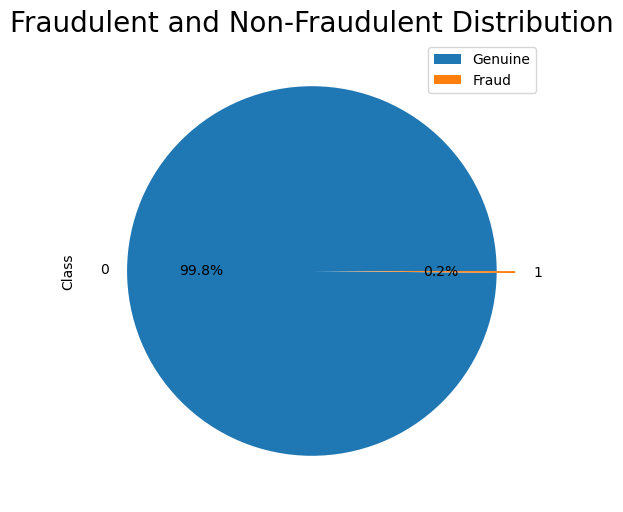

In [16]:
df["Class"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%')
plt.title("Fraudulent and Non-Fraudulent Distribution",fontsize=20)
plt.legend(["Genuine", "Fraud"])
plt.show()

In [19]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [31]:
df[['Time','Amount', 'Class']].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


# Kolom `Amount`

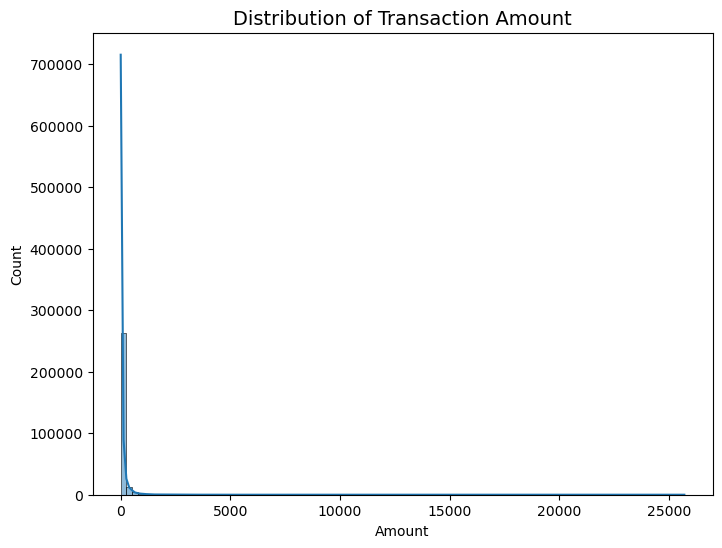

In [24]:
col = 'Amount'

plt.figure(figsize=(8, 6))
plt.title('Distribution of Transaction Amount', fontsize=14)
sns.histplot(df[col], bins=100, kde=True)
plt.show()


Dari grafik di atas terlihat bahwa customer banyak melakukan transaksi pada nilai transaksi yang mendekati 0 dollar. dan sangat sedikit customer yang melakukan transaksi dengan nilai transaksi yang mulai menjauhi nilai transaksi 0 dollar

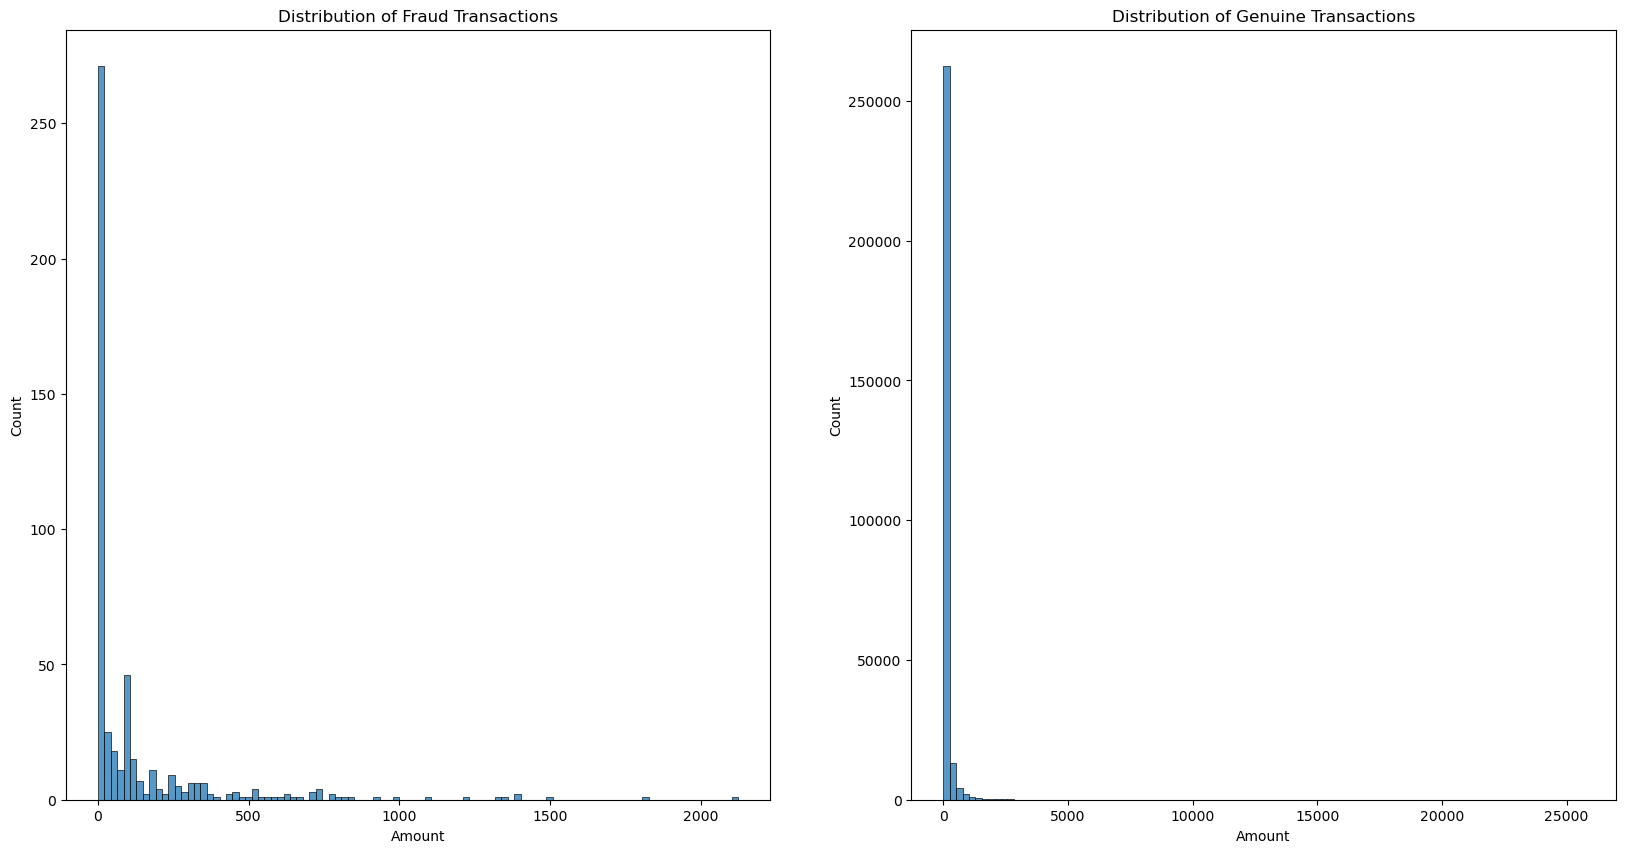

In [29]:
# Distribution of amount vs class
fig, axs = plt.subplots(ncols=2,figsize=(20,10))
sns.histplot(df[df['Class'] == 1]['Amount'], bins=100, ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.histplot(df[df['Class'] == 0]['Amount'], bins=100, ax=axs[1])
axs[1].set_title("Distribution of Genuine Transactions")

plt.show()

In [30]:
# check the amount distribution of fraud
print("Fraud Transaction distribution : \n",df[(df['Class'] == 1)]['Amount'].value_counts().head())
print("\n")
print("Maximum amount of fraud transaction - ",df[(df['Class'] == 1)]['Amount'].max())
print("Minimum amount of fraud transaction - ",df[(df['Class'] == 1)]['Amount'].min())

Fraud Transaction distribution : 
 1.000000     113
0.000000      27
99.990000     27
0.760000      17
0.770000      10
Name: Amount, dtype: int64


Maximum amount of fraud transaction -  2125.87
Minimum amount of fraud transaction -  0.0


- Pada grafik "Distribution of Fraud Transaction" terjadi transaksi penipuan dengan total transaksi di sekitar 2000 dollar dan banyak customer tertinggi yang melakukan tersebut di antara total transaksi 0-500 dollar.

- Pada grafik "Distribution of Genuine Transactions" terjadi total transaksi hingga 25000 dollar 


Ringkasan

- Nilai besar pada kolom `Amount` bukan atau belom tentu penipuan. 
- Sebagian besar Fraud data dengan total transaksi yang kecil di bawah 2000 dollar dan bahkan besar transasksi penipuan berada mendekati 0 dollar

# Kolom `Time`

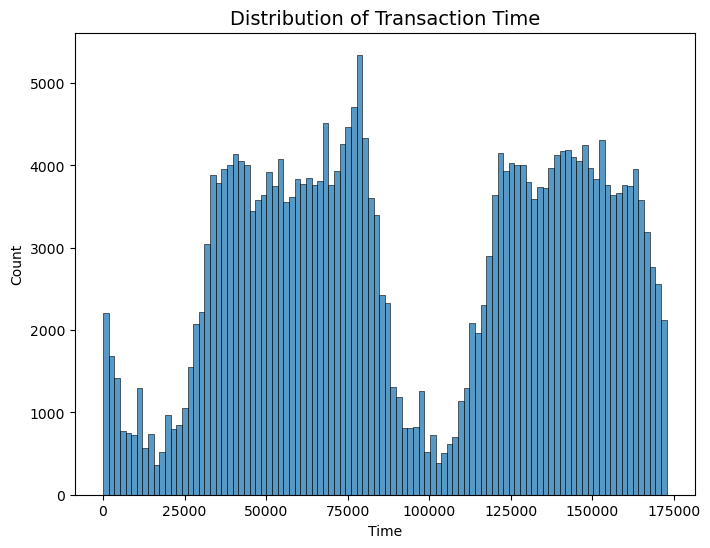

In [6]:
col = 'Time'

plt.figure(figsize=(8,6))
plt.title('Distribution of Transaction Time', fontsize=14)
sns.histplot(df[col], bins=100)
plt.show()

In [36]:
def convert_to_datetime_hour_with_days(time_in_seconds_1):
    days = int(time_in_seconds_1 // 86400)
    hours = int((time_in_seconds_1 % 86400) // 3600)
    minutes = int((time_in_seconds_1 % 3600) // 60)
    seconds = int(time_in_seconds_1 % 60)
    
    if days > 0:
        return f'{days} hari jam {hours:02d}:{minutes:02d}:{seconds:02d}'
    else:
        return f'jam {hours:02d}:{minutes:02d}:{seconds:02d}'


In [39]:
time_in_seconds = 37500
time_formatted = convert_to_datetime_hour_with_days(time_in_seconds)

print(time_formatted)

time_in_seconds = 80000
time_formatted = convert_to_datetime_hour_with_days(time_in_seconds)

print(time_formatted)

jam 10:25:00
jam 22:13:20


Transaksi meninggi di waktu sekitar pukul 10.30 pagi dan paling tinggi customer yang melakukan transaksi di jam 22.00 malam

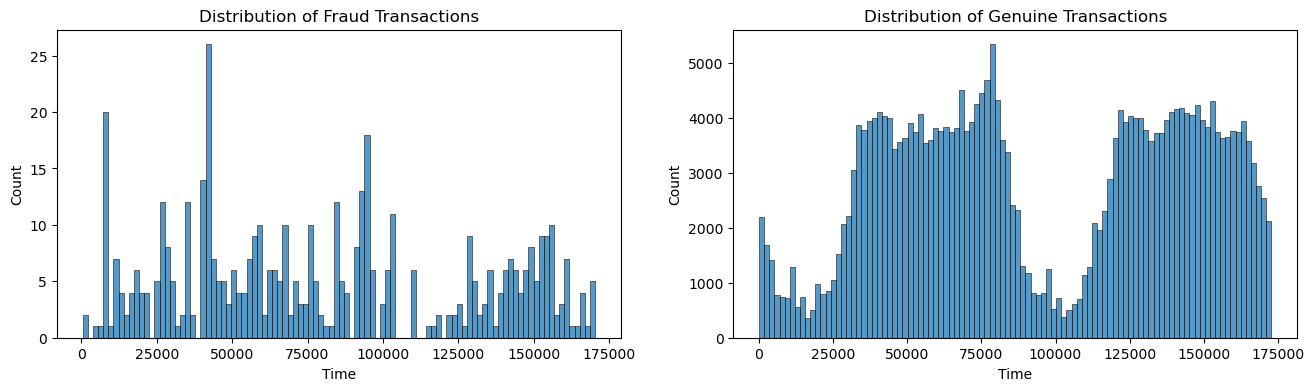

In [11]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.histplot(df[df['Class'] == 1]['Time'], bins=100, ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.histplot(df[df['Class'] == 0]['Time'], bins=100, ax=axs[1])
axs[1].set_title("Distribution of Genuine Transactions")

plt.show()

In [42]:
print("Maximum time of fraud transaction - ",df[(df['Class'] == 1)]['Time'].max())
print("Minimum time of fraud transaction - ",df[(df['Class'] == 1)]['Time'].min())

print("Maximum time of fraud transaction - ",df[(df['Class'] == 0)]['Time'].max())
print("Minimum time of fraud transaction - ",df[(df['Class'] == 0)]['Time'].min())

Maximum time of fraud transaction -  170348.0
Minimum time of fraud transaction -  406.0
Maximum time of fraud transaction -  172792.0
Minimum time of fraud transaction -  0.0


In [38]:
time_in_seconds_1 = 406
time_formatted = convert_to_datetime_hour_with_days(time_in_seconds_1)

print(time_formatted)

time_in_seconds_1 = 170348
time_formatted = convert_to_datetime_hour_with_days(time_in_seconds_1)

print(time_formatted)

jam 00:06:46
1 hari jam 23:19:08


Waktu transaksi yang terindikasi penipuan terdini ada pada jam 00.06 pagi, dan di hari selanjutnya pada jam 23.19 malam.

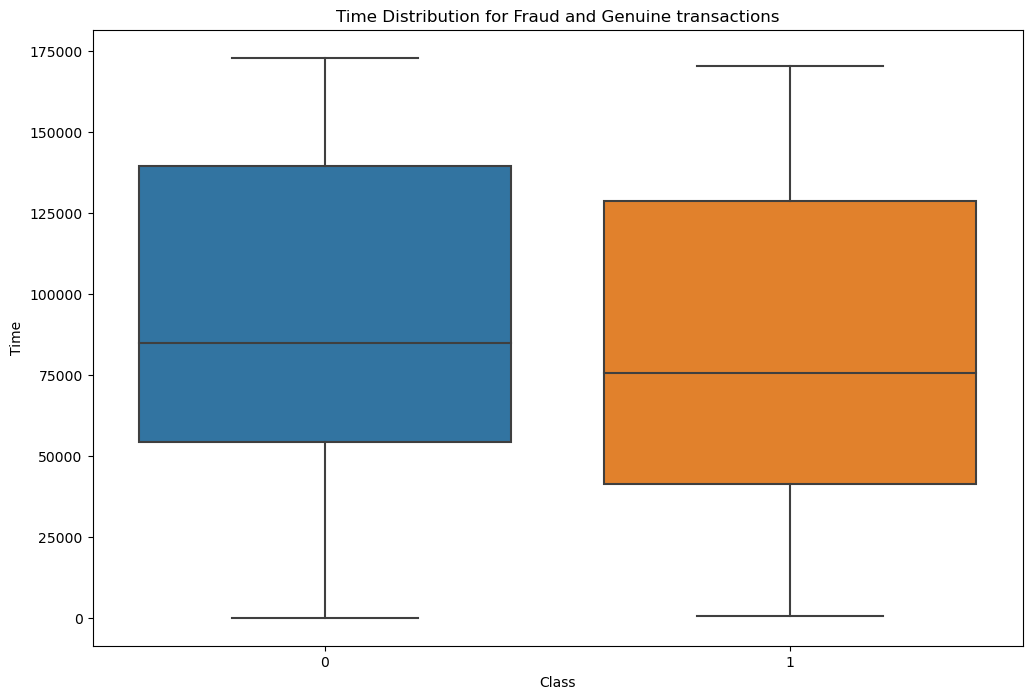

In [41]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x='Class', y='Time',data = df)

plt.title('Time Distribution for Fraud and Genuine transactions')
plt.show()

- Kisaran data `Time` antara 0 dan 175000 
- Ada 2 puncak, yang mungkin menunjukkan siklus siang/malam (lebih banyak transaksi dilakukan pada malam hari)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

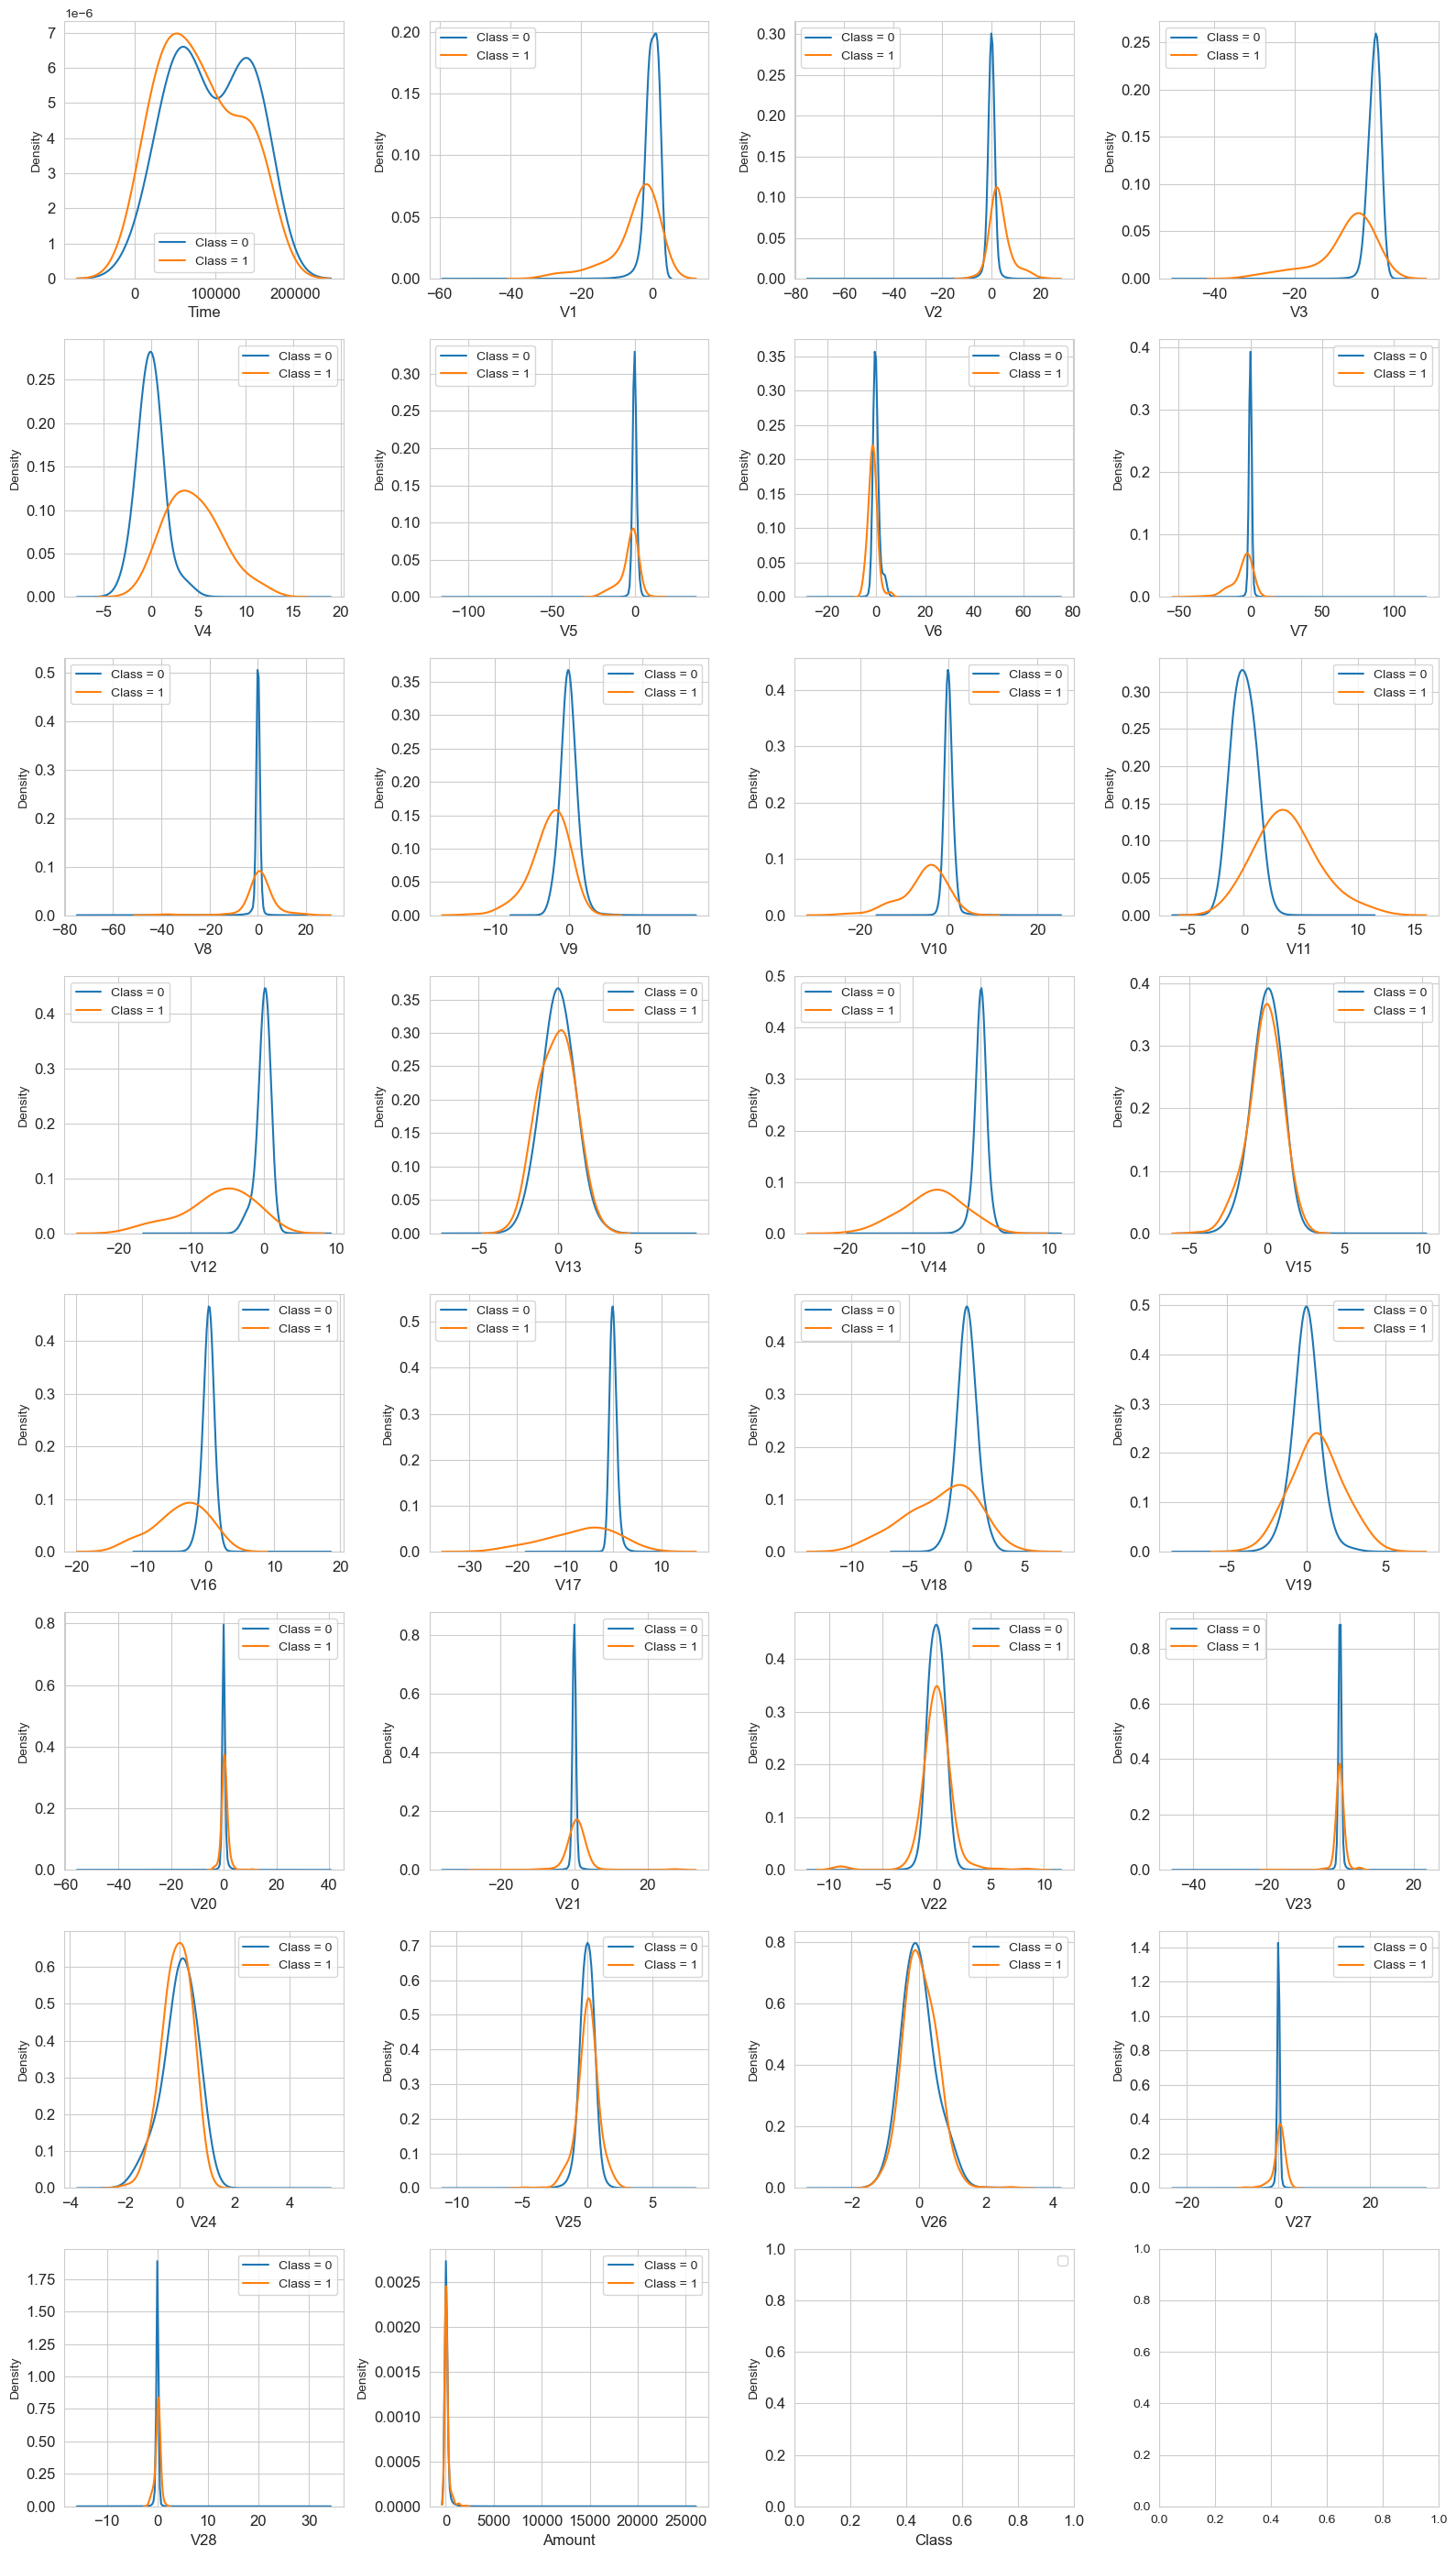

In [46]:
var = df.columns.values

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw_method=0.5,label="Class = 0", warn_singular=False)
    sns.kdeplot(t1[feature], bw_method=0.5,label="Class = 1", warn_singular=False)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.legend()

plt.tight_layout()  # Untuk menghindari tumpang tindih antar subplots
plt.show()


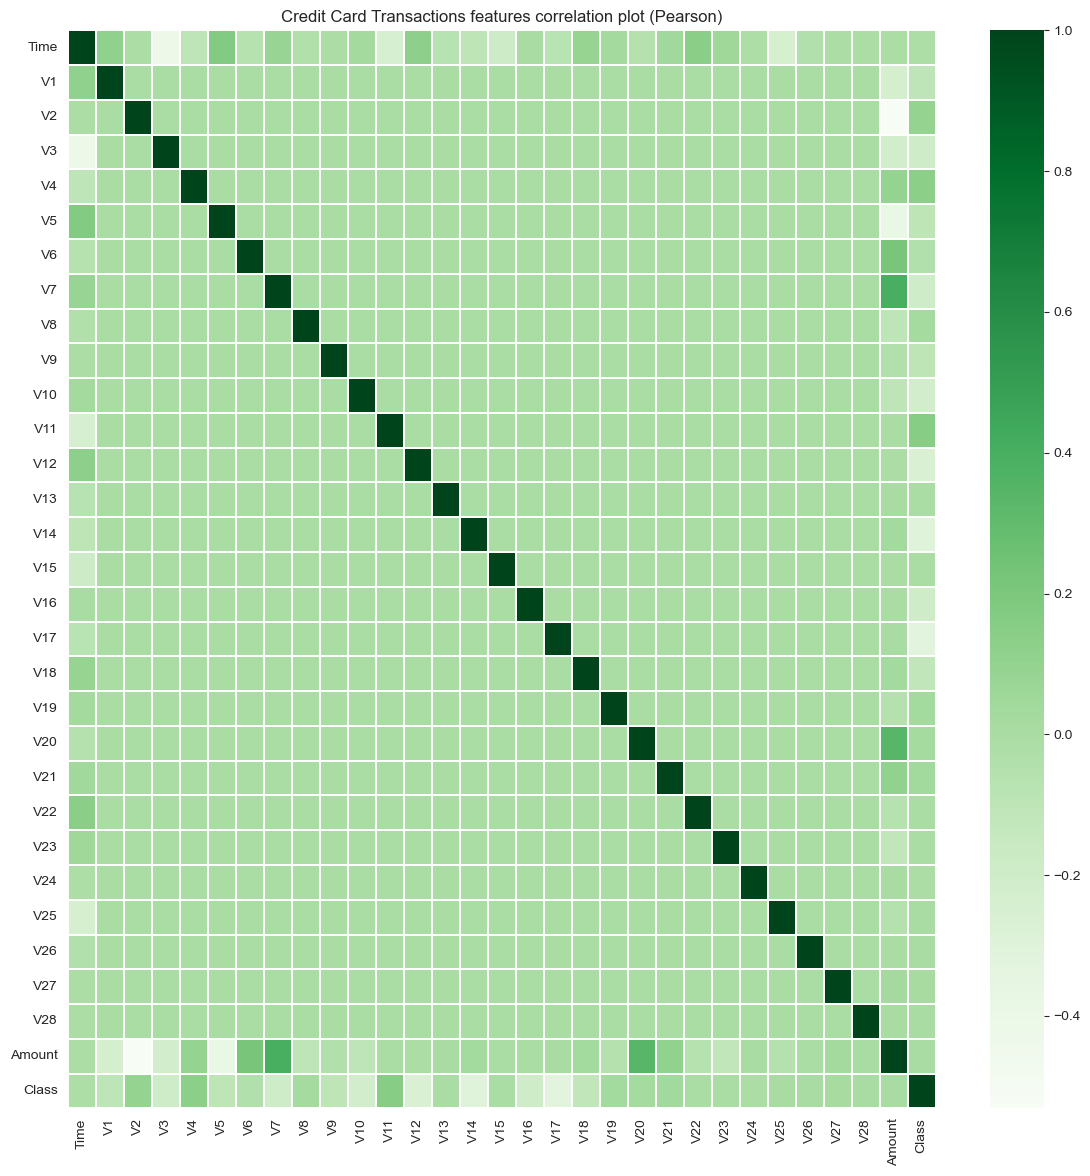

In [47]:
#Plotting a heatmap to visualize the correlation between the variables
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Greens")
plt.show()

- Tidak ada nilai yang hilang 
- Kolom tidak berkorelasi 
- kolom Penskalaan untuk Waktu dan Jumlah

# Data Preprocessing

In [4]:
def split_input_output(df, output_column):
    # Split input & output
    y = df[output_column]
    x = df.drop([output_column], axis=1)

    # Print splitting
    print('Input shape  :', x.shape)
    print('Output shape :', y.shape)
    print('Input NAN    :')
    print(x.isnull().sum())
    print('Benchmark    :')
    print(y.value_counts(normalize=True))
    
    return x, y


In [5]:
x, y = split_input_output(df, 'Class')

Input shape  : (284807, 30)
Output shape : (284807,)
Input NAN    :
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64
Benchmark    :
0   0.998273
1   0.001727
Name: Class, dtype: float64


In [6]:
def split_train_test(x, y, test_size=0.2, random_state=42, return_file=True):
    # Split test & rest (train & valid)
    x_train, x_test, y_train, y_test = train_test_split( 
                                            x,
                                            y,
                                            test_size=test_size,
                                            random_state=random_state
                                        )
    
    # Split train & valid
    x_train, x_valid, y_train, y_valid = train_test_split(
                                            x_train,
                                            y_train,
                                            test_size=test_size,
                                            random_state=random_state
                                        )
    
    # Print splitting
    print('x_train shape :', x_train.shape)
    print('y_train shape :', y_train.shape)
    print('x_valid shape  :', x_valid.shape)
    print('y_valid shape  :', y_valid.shape)
    print('x_test shape  :', x_test.shape)
    print('y_test shape  :', y_test.shape)

    if return_file:
        return x_train, x_valid, x_test, y_train, y_valid, y_test


In [7]:
x_train, x_valid, x_test, y_train, y_valid, y_test = split_train_test(x,y)

x_train shape : (182276, 30)
y_train shape : (182276,)
x_valid shape  : (45569, 30)
y_valid shape  : (45569,)
x_test shape  : (56962, 30)
y_test shape  : (56962,)


In [8]:
from sklearn.preprocessing import RobustScaler

def fit_standardize(df, columns=['Time', 'Amount'], standardizer_file=None):
    """Find standardizer data"""
    standardizer = RobustScaler()

    # Fit standardizer
    standardizer.fit(df[columns])

    # Save standardizer to file
    if standardizer_file:
        with open(standardizer_file, 'wb') as file:
            pickle.dump(standardizer, file)
    
    return standardizer


In [9]:
standardizer = fit_standardize(df=x_train)

In [10]:
def transform_standardize(df, standardizer, columns=['Time', 'Amount']):
    """Function to standardize data"""
    df_standard = pd.DataFrame(standardizer.transform(df[columns]))
    df_standard.index = df.index
    df[columns] = df_standard
    return df


In [11]:
# Transform
x_train_std = transform_standardize(df = x_train,
                                    standardizer = standardizer)

In [12]:
x_train_std.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
59649,-0.420163,1.191774,-0.383273,0.430567,0.558578,-0.746648,-0.304623,-0.345773,-0.062680,-1.024776,0.799512,-0.435582,-0.082861,0.230108,0.208955,1.093681,-1.582997,0.050017,0.842054,-1.609739,-0.473724,-0.268839,-0.356484,-0.008959,0.038837,0.403435,-0.303484,0.053645,0.035033,0.517917
67634,-0.376797,-0.875790,0.455441,1.694000,1.249859,-1.436989,0.179556,0.149759,0.591796,0.177585,-0.767719,-1.255324,-0.288735,-0.927478,0.140208,0.357347,-0.092548,0.207196,0.431400,0.555962,0.159780,0.187286,0.304132,0.370389,0.351580,-0.476241,-0.414433,0.046360,0.128270,2.022858
187080,0.501161,2.063727,0.000999,-1.046122,0.411420,-0.087986,-1.203515,0.229086,-0.373278,0.440022,0.054071,-0.619410,0.796263,0.729345,0.143029,-0.033926,-0.139193,-0.322968,-0.954544,0.138520,-0.183603,-0.281500,-0.642398,0.334021,0.064531,-0.276710,0.193233,-0.066209,-0.058554,-0.295249
143853,0.011376,-1.572086,1.174873,-0.024236,-2.536910,2.021836,3.241867,-0.104620,1.164913,0.132853,-0.028735,-0.210440,-0.203718,-0.048409,0.022742,0.897522,0.860820,-1.040058,0.084440,-0.182334,0.407795,-0.239505,-0.689360,-0.206032,1.030430,0.437922,0.823354,-0.024648,-0.051425,-0.202131
216575,0.655724,-0.399104,1.106938,-0.348765,-0.471298,0.431424,-1.194488,0.988224,-0.335609,0.541608,0.294447,-1.253016,-0.880757,-1.390311,0.492382,0.667168,-0.417263,-0.504087,0.344386,0.116831,-0.118840,0.336344,1.238881,-0.113485,-0.113386,-0.876774,-0.301214,-0.370998,-0.179364,-0.295108


In [13]:
x_train_std.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,182276.000000,182276.000000,182276.000000,182276.000000,182276.000000,182276.000000,182276.000000,182276.000000,182276.000000,182276.000000,182276.000000,182276.000000,182276.000000,182276.000000,182276.000000,182276.000000,182276.000000,182276.000000,182276.000000,182276.000000,182276.000000,182276.000000,182276.000000,182276.000000,182276.000000,182276.000000,182276.000000,182276.000000,182276.000000,182276.000000
mean,0.118173,-0.000496,0.000620,-0.001459,-0.000093,-0.000414,0.001552,-0.001042,-0.002027,0.000986,-0.000633,0.002097,-0.002372,-0.000073,-0.000736,-0.000051,0.000498,-0.000581,-0.000161,0.000902,0.001038,-0.000339,-0.000137,0.000653,0.000357,-0.001881,0.000038,-0.000380,-0.000129,0.934029
std,0.557778,1.968199,1.661023,1.524433,1.418630,1.398726,1.341856,1.263245,1.213241,1.098672,1.092678,1.021249,1.005677,0.996734,0.964353,0.914849,0.881219,0.859911,0.839339,0.815422,0.775282,0.743648,0.725926,0.618122,0.604849,0.522371,0.482101,0.404368,0.330388,3.568911
min,-0.994952,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.320155,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.391307,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-36.666000,-2.836627,-7.495741,-2.534330,-9.895244,-15.430084,-0.309175
25%,-0.359214,-0.917797,-0.597934,-0.890934,-0.848321,-0.689116,-0.767962,-0.553619,-0.208026,-0.641897,-0.535412,-0.761468,-0.408216,-0.648864,-0.426441,-0.582320,-0.469665,-0.484849,-0.498375,-0.455523,-0.211850,-0.228869,-0.541842,-0.161245,-0.353721,-0.319150,-0.327143,-0.070992,-0.053194,-0.229841
50%,0.000000,0.017078,0.067194,0.179143,-0.021268,-0.054961,-0.273748,0.039914,0.022449,-0.049805,-0.093569,-0.029513,0.138711,-0.013279,0.050970,0.048539,0.068166,-0.066413,-0.004420,0.004633,-0.062630,-0.029942,0.006426,-0.010764,0.040949,0.014265,-0.051215,0.001272,0.011330,0.000000
75%,0.640786,1.315437,0.804057,1.025770,0.741525,0.612443,0.399529,0.570656,0.327630,0.599647,0.453504,0.739740,0.618746,0.661543,0.494520,0.648331,0.525345,0.400234,0.500712,0.459103,0.133595,0.186167,0.529241,0.148003,0.439526,0.350675,0.240569,0.091125,0.078348,0.770159
max,1.034606,2.454930,22.057729,4.101716,16.715537,34.801666,73.301626,120.589494,20.007208,10.392889,15.245686,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,5.852484,3.517346,31.612198,33.847808,361.067342


### Handling Imbalanced Data

In [14]:
# See that the data is unbalanced
y_train.value_counts(normalize=True)

0   0.998190
1   0.001810
Name: Class, dtype: float64

In [15]:
def random_undersampler(x, y):
    """Function to under sample the majority data"""
    # Create resampling object
    rus = RandomUnderSampler(random_state = 42)

    # Balancing the set data
    x_resample, y_resample = rus.fit_resample(x, y)

    # Print
    print('Distribution before resampling :')
    print(y.value_counts())
    print("")
    print('Distribution after resampling  :')
    print(y_resample.value_counts())

    return x_resample, y_resample

In [16]:
x_train_clean, y_train_clean = random_undersampler(x_train_std, y_train)

Distribution before resampling :
0    181946
1       330
Name: Class, dtype: int64

Distribution after resampling  :
0    330
1    330
Name: Class, dtype: int64


In [17]:
from sklearn.preprocessing import RobustScaler
from sklearn.utils import shuffle

# Generate a standardizer
def generate_standardizer(df, columns=['Time', 'Amount']):
    standardizer = RobustScaler()
    standardizer.fit(df[columns])
    return standardizer

# Function to preprocess data
def preprocess_data(x, y, standardizer, data_type='train'):
    # Clean data
    x_clean = transform_standardize(x, standardizer)
    y_clean = y
    
    # For training data, shuffle and undersample
    if data_type == 'train':
        x_clean, y_clean = random_undersampler(x_clean, y_clean)
    
    return x_clean, y_clean

# Generate a standardizer for your data
standardizer = generate_standardizer(df)

In [18]:
x_train_clean, y_train_clean = preprocess_data(x_train, y_train, standardizer, data_type='train')
print("X clean shape:", x_train_clean.shape)
print("y clean shape:", y_train_clean.shape)

Distribution before resampling :
0    181946
1       330
Name: Class, dtype: int64

Distribution after resampling  :
0    330
1    330
Name: Class, dtype: int64
X clean shape: (660, 30)
y clean shape: (660,)


In [19]:
x_valid_clean, y_valid_clean = preprocess_data(x_valid, y_valid, standardizer, data_type='valid')
print("X clean shape:", x_valid_clean.shape)
print("y clean shape:", y_valid_clean.shape)

X clean shape: (45569, 30)
y clean shape: (45569,)


In [20]:
x_test_clean, y_test_clean = preprocess_data(x_test, y_test, standardizer, data_type = 'test')
print("X clean shape:", x_test_clean.shape)
print("y clean shape:", y_test_clean.shape)

X clean shape: (56962, 30)
y clean shape: (56962,)


In [21]:
x_train_clean.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
108,-0.994974,0.010896,-4.103200,-3.851064,0.441299,-0.782426,-0.984586,2.057943,-0.886221,-1.229767,0.505356,-1.135743,-0.486991,-0.239694,1.035044,-0.140922,-2.073622,0.215169,0.946894,-1.007244,1.738072,0.589528,-0.372529,-1.085277,0.852518,0.083231,0.863390,-0.350858,0.117085,-0.080196
253,-0.994990,1.025748,-0.306756,0.674039,0.777366,-0.686114,0.005243,-0.326563,0.248276,0.477754,-0.062937,1.194994,0.528757,-1.676383,0.434254,-0.430040,-0.264339,0.188002,-0.549489,0.069442,-0.142633,-0.193478,-0.577601,0.093765,0.201732,0.137199,0.180375,-0.021530,0.010865,-0.300736
145,-0.994973,2.207996,-0.508445,-1.617706,-0.548678,0.158585,-0.243806,-0.224019,-0.311674,-0.516617,0.721795,-1.349728,0.678949,2.167929,-0.184130,0.315813,-1.705579,-0.496076,1.314364,-0.781258,-0.479193,-0.073409,0.515180,-0.042755,0.081220,0.372476,-0.012616,0.020496,-0.049481,-0.309404
591,-0.994981,-1.929597,4.066413,-4.865184,5.898602,-0.552493,-1.555962,-3.833623,0.679512,-3.463765,-6.683689,7.021278,-11.102493,1.711755,-10.447633,-2.799076,-6.261741,-11.647158,-3.451436,-0.507537,0.942489,1.137212,0.674245,-0.531765,-0.433409,0.378659,0.198107,0.869694,0.228048,-0.311733
208,-0.994975,1.945070,-0.092519,-2.326725,0.111179,0.760207,-1.076639,0.863503,-0.448735,0.001407,0.079888,0.708385,1.013970,0.135238,1.006014,-0.217154,-0.511617,-0.671797,0.164264,0.418680,-0.076227,0.251270,0.701590,-0.215234,-0.512962,0.587892,-0.409351,-0.049823,-0.070895,-0.295492
51,-0.994985,-0.722989,-0.089588,1.511537,-1.853342,0.166258,-0.708832,0.761265,-0.265925,-1.753251,0.293464,0.696929,-0.257303,-0.402574,0.168154,-0.460600,-1.075263,-0.609940,1.472884,-0.748621,-0.251104,-0.376377,-0.731717,-0.195253,0.006206,0.327437,0.900854,-0.254712,-0.187746,-0.301414
281,-0.994972,-2.354839,-1.040233,-0.612059,-0.598811,-2.387032,4.048882,3.391650,0.170869,-0.150036,-1.092601,0.697602,0.051239,-0.148154,0.096112,0.953443,0.492159,-0.504280,-0.181030,-0.996638,-0.625851,0.087475,1.021589,0.146343,-0.849691,-0.163932,0.442861,0.124886,-0.376472,-0.138041
234,-0.994989,1.149887,-0.217033,1.232729,1.369140,-1.211925,-0.265780,-0.731111,0.234122,1.277607,-0.127131,-1.227617,-0.872685,-2.512646,0.147292,0.457303,0.198133,-0.103545,0.250668,-0.193123,-0.296327,-0.091480,-0.181917,0.024644,0.308051,0.328784,-0.399886,0.055795,0.032807,-0.309769
76,-0.994988,-0.697336,1.257688,0.795065,-0.082906,-0.146230,-0.550024,0.168773,0.579393,-0.650007,-0.534589,0.873584,0.137558,-0.830648,0.258738,0.286401,0.843718,-0.138626,0.623481,0.326486,-0.040589,-0.203986,-0.729643,-0.005594,-0.081204,-0.156015,0.080910,0.110296,0.019538,-0.311344
143,-0.994987,1.034747,-0.000268,-0.077818,0.559345,-0.046012,-0.730567,0.530899,-0.249195,-0.302910,-0.168350,0.126961,0.720696,0.683451,0.403492,0.954446,-0.282139,-0.005585,-1.388655,-0.288143,0.124531,-0.284135,-1.030060,0.075038,0.097655,0.196286,0.154124,-0.063368,0.026134,-0.289474


### Data Splitting

In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier #xgboost
from sklearn import model_selection
from sklearn.neural_network import MLPClassifier #neural network
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectKBest, chi2
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

### Model yang dipilih :
- KNN
- Logistic Regression
- Random Forest
- XGBoost

In [23]:
def create_model_param():
    """Create the model objects"""
    knn_params = {
        'n_neighbors': [50, 100, 150],
    }

    lgr_params = {
        # 'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1],
        'max_iter': [100, 150, 200]
    }
    rf_params = {
        "n_estimators" : [30,70,100],
        "min_samples_split" : [2, 4, 6],
        "criterion" : ["gini", "entropy", "log_loss"]
    }

    xgb_params = {
        'n_estimators': [10, 25, 40]
    }

    # Create model params
    list_of_param = {
        'KNeighborsClassifier': knn_params,
        'LogisticRegression': lgr_params,
        'RandomForestClassifier': rf_params,
        'XGBClassifier': xgb_params
    }

    return list_of_param


In [24]:
def create_model_object():
    """Create the model objects"""
    print("Creating model objects")

    # Create model objects
    knn = KNeighborsClassifier()
    lgr = LogisticRegression(solver='sag')
    rf = RandomForestClassifier()
    xgb = XGBClassifier()

    # Create list of model
    list_of_model = [
        {'model_name': knn.__class__.__name__, 'model_object': knn},
        {'model_name': rf.__class__.__name__, 'model_object': rf},
        {'model_name': lgr.__class__.__name__, 'model_object': lgr},
        {'model_name': xgb.__class__.__name__, 'model_object': xgb}
    ]

    return list_of_model


In [25]:
def train_model(return_file=True):
    """Function to get the best model"""
    # Create list of params & models
    list_of_param = create_model_param()
    list_of_model = create_model_object()

    # List of trained model
    list_of_tuned_model = {}

    # Train model
    for base_model in list_of_model:
        # Current condition
        model_name = base_model['model_name']
        model_obj = copy.deepcopy(base_model['model_object'])
        model_param = list_of_param[model_name]

        # Debug message
        print('Training model :', model_name)

        # Create model object
        model = RandomizedSearchCV(estimator = model_obj,
                                   param_distributions = model_param,
                                   n_iter=5,
                                   cv = 5,
                                   random_state = 123,
                                   n_jobs=1,
                                   verbose=10,
                                   scoring = 'roc_auc')
        
        # Train model
        model.fit(x_train, y_train)

        # Predict
        y_pred_proba_train = model.predict_proba(x_train)[:, 1]
        y_pred_proba_valid = model.predict_proba(x_valid)[:, 1]
        
        # Get score
        train_score = roc_auc_score(y_train, y_pred_proba_train)
        valid_score = roc_auc_score(y_valid, y_pred_proba_valid)

        # Append
        list_of_tuned_model[model_name] = {
            'model': model,
            'train_auc': train_score,
            'valid_auc': valid_score,
            'best_params': model.best_params_
        }

        print("Done training")
        print("")
        
    if return_file:
        return list_of_param, list_of_model, list_of_tuned_model    


In [26]:
list_of_param, list_of_model, list_of_tuned_model = train_model()

Creating model objects
Training model : KNeighborsClassifier
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START n_neighbors=50..............................................


d:\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV 1/5; 1/3] END ...............n_neighbors=50;, score=0.900 total time=   5.5s
[CV 2/5; 1/3] START n_neighbors=50..............................................
[CV 2/5; 1/3] END ...............n_neighbors=50;, score=0.954 total time=   5.4s
[CV 3/5; 1/3] START n_neighbors=50..............................................
[CV 3/5; 1/3] END ...............n_neighbors=50;, score=0.931 total time=   5.2s
[CV 4/5; 1/3] START n_neighbors=50..............................................
[CV 4/5; 1/3] END ...............n_neighbors=50;, score=0.946 total time=   5.2s
[CV 5/5; 1/3] START n_neighbors=50..............................................
[CV 5/5; 1/3] END ...............n_neighbors=50;, score=0.939 total time=   5.1s
[CV 1/5; 2/3] START n_neighbors=100.............................................
[CV 1/5; 2/3] END ..............n_neighbors=100;, score=0.900 total time=   5.3s
[CV 2/5; 2/3] START n_neighbors=100.............................................
[CV 2/5; 2/3] END ..........

d:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 1/5] END .........C=0.01, max_iter=150;, score=0.972 total time=   6.5s
[CV 2/5; 1/5] START C=0.01, max_iter=150........................................


d:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 1/5] END .........C=0.01, max_iter=150;, score=0.993 total time=   6.7s
[CV 3/5; 1/5] START C=0.01, max_iter=150........................................


d:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 1/5] END .........C=0.01, max_iter=150;, score=0.980 total time=   6.5s
[CV 4/5; 1/5] START C=0.01, max_iter=150........................................


d:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 1/5] END .........C=0.01, max_iter=150;, score=0.994 total time=   6.5s
[CV 5/5; 1/5] START C=0.01, max_iter=150........................................


d:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 1/5] END .........C=0.01, max_iter=150;, score=0.978 total time=   6.5s
[CV 1/5; 2/5] START C=0.1, max_iter=100.........................................


d:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 2/5] END ..........C=0.1, max_iter=100;, score=0.972 total time=   4.4s
[CV 2/5; 2/5] START C=0.1, max_iter=100.........................................


d:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 2/5] END ..........C=0.1, max_iter=100;, score=0.993 total time=   4.4s
[CV 3/5; 2/5] START C=0.1, max_iter=100.........................................


d:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 2/5] END ..........C=0.1, max_iter=100;, score=0.979 total time=   4.4s
[CV 4/5; 2/5] START C=0.1, max_iter=100.........................................


d:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 2/5] END ..........C=0.1, max_iter=100;, score=0.994 total time=   4.3s
[CV 5/5; 2/5] START C=0.1, max_iter=100.........................................


d:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 2/5] END ..........C=0.1, max_iter=100;, score=0.978 total time=   4.4s
[CV 1/5; 3/5] START C=0.1, max_iter=150.........................................


d:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 3/5] END ..........C=0.1, max_iter=150;, score=0.972 total time=   6.6s
[CV 2/5; 3/5] START C=0.1, max_iter=150.........................................


d:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 3/5] END ..........C=0.1, max_iter=150;, score=0.993 total time=   6.7s
[CV 3/5; 3/5] START C=0.1, max_iter=150.........................................


d:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 3/5] END ..........C=0.1, max_iter=150;, score=0.977 total time=   6.8s
[CV 4/5; 3/5] START C=0.1, max_iter=150.........................................


d:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 3/5] END ..........C=0.1, max_iter=150;, score=0.994 total time=   6.6s
[CV 5/5; 3/5] START C=0.1, max_iter=150.........................................


d:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 3/5] END ..........C=0.1, max_iter=150;, score=0.978 total time=   6.7s
[CV 1/5; 4/5] START C=0.01, max_iter=100........................................


d:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 4/5] END .........C=0.01, max_iter=100;, score=0.972 total time=   4.5s
[CV 2/5; 4/5] START C=0.01, max_iter=100........................................


d:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 4/5] END .........C=0.01, max_iter=100;, score=0.992 total time=   4.5s
[CV 3/5; 4/5] START C=0.01, max_iter=100........................................


d:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 4/5] END .........C=0.01, max_iter=100;, score=0.980 total time=   4.4s
[CV 4/5; 4/5] START C=0.01, max_iter=100........................................


d:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 4/5] END .........C=0.01, max_iter=100;, score=0.994 total time=   4.5s
[CV 5/5; 4/5] START C=0.01, max_iter=100........................................


d:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 4/5] END .........C=0.01, max_iter=100;, score=0.978 total time=   4.5s
[CV 1/5; 5/5] START C=0.01, max_iter=200........................................


d:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 5/5] END .........C=0.01, max_iter=200;, score=0.972 total time=   8.9s
[CV 2/5; 5/5] START C=0.01, max_iter=200........................................


d:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 5/5] END .........C=0.01, max_iter=200;, score=0.993 total time=   8.9s
[CV 3/5; 5/5] START C=0.01, max_iter=200........................................


d:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 5/5] END .........C=0.01, max_iter=200;, score=0.979 total time=   9.0s
[CV 4/5; 5/5] START C=0.01, max_iter=200........................................


d:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 5/5] END .........C=0.01, max_iter=200;, score=0.994 total time=   9.1s
[CV 5/5; 5/5] START C=0.01, max_iter=200........................................


d:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 5/5] END .........C=0.01, max_iter=200;, score=0.978 total time=   9.3s


d:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Done training

Training model : XGBClassifier
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START n_estimators=10.............................................
[CV 1/5; 1/3] END ..............n_estimators=10;, score=0.878 total time=   2.3s
[CV 2/5; 1/3] START n_estimators=10.............................................
[CV 2/5; 1/3] END ..............n_estimators=10;, score=0.961 total time=   0.8s
[CV 3/5; 1/3] START n_estimators=10.............................................
[CV 3/5; 1/3] END ..............n_estimators=10;, score=0.929 total time=   0.8s
[CV 4/5; 1/3] START n_estimators=10.............................................
[CV 4/5; 1/3] END ..............n_estimators=10;, score=0.953 total time=   0.8s
[CV 5/5; 1/3] START n_estimators=10.............................................
[CV 5/5; 1/3] END ..............n_estimators=10;, score=0.945 total time=   0.7s
[CV 1/5; 2/3] START n_estimators=25.............................................
[CV

In [27]:
list_of_tuned_model

{'KNeighborsClassifier': {'model': RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=5, n_jobs=1,
                     param_distributions={'n_neighbors': [50, 100, 150]},
                     random_state=123, scoring='roc_auc', verbose=10),
  'train_auc': 0.9982306605123266,
  'valid_auc': 0.943065494176464,
  'best_params': {'n_neighbors': 150}},
 'RandomForestClassifier': {'model': RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5, n_jobs=1,
                     param_distributions={'criterion': ['gini', 'entropy',
                                                        'log_loss'],
                                          'min_samples_split': [2, 4, 6],
                                          'n_estimators': [30, 70, 100]},
                     random_state=123, scoring='roc_auc', verbose=10),
  'train_auc': 1.0,
  'valid_auc': 0.9657640643885288,
  'best_params': {'n_estimators': 100,
   'min_samples_split': 4,
   'criterion': 'log_loss'}},


In [29]:
def get_best_model(list_of_tuned_model):
    best_model_name = None
    best_model = None
    best_performance = -99999
    best_model_param = None

    for model_name, model in list_of_tuned_model.items():
        if model['valid_auc'] > best_performance:
            best_model_name = model_name
            best_model = model['model']
            best_performance = model['valid_auc']
            best_model_param = model['best_params']

    print('=============================================')
    print('Best model        :', best_model_name)
    print('Metric score      :', best_performance)
    print('Best model params :', best_model_param)
    print('=============================================')

    if list_of_tuned_model:
        return best_model

# Train models and get list_of_tuned_model using your function train_model()


In [30]:
best_model = get_best_model(list_of_tuned_model)

Best model        : XGBClassifier
Metric score      : 0.9759123310625206
Best model params : {'n_estimators': 25}


Dikarenakan best model nya adalah XGBoost, jadi akan melakukan prediksi test dengan XGBoost

In [31]:
y_test_proba = best_model.predict_proba(x_test)[:, 1]
y_pred = best_model.predict(x_test)

# Get score
score = roc_auc_score(y_test, y_test_proba)

In [32]:
score

0.9660779425022681

# Unsupervised Learning

**Model yang dipilih :**
- Isolation Forest
- LOF (Local Outlier Factor)

In [33]:
features = pd.concat([x_train, x_valid, x_test]).reset_index(drop=True)
labels = pd.concat([y_train, y_valid, y_test]).reset_index(drop=True)

In [34]:
features.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.994972,-3.017333,3.215950,-2.844590,-1.341856,-0.491730,-1.776197,0.071360,1.470371,0.070087,0.964545,0.399462,1.058746,-0.642737,1.800295,-0.834886,-0.189111,0.076803,0.095513,-0.174083,0.338884,0.258544,0.843397,0.086503,0.026228,0.082502,0.112516,0.618475,0.454782,-0.311582
1,-0.994977,2.099809,-0.890100,-2.817319,-1.208673,0.845043,0.138699,0.064751,-0.009282,-0.974776,1.022881,0.703256,-1.036292,-2.175628,1.096985,-0.204064,-0.335852,1.019273,-2.151293,0.211516,-0.196549,0.567082,1.621804,-0.242970,-1.581675,0.522156,0.415164,-0.070427,-0.118390,-0.302299
2,-0.994989,0.812352,-0.586909,-0.667514,0.962864,0.401248,0.721682,0.343162,0.121239,0.059051,-0.012450,-0.054412,0.187907,-0.886168,0.633540,-0.192997,-0.052547,-0.494860,0.210361,0.292052,0.259607,0.084476,-0.144437,-0.487009,-1.312940,0.806243,-0.202556,-0.027304,0.024049,-0.266414
3,-0.994977,-2.621263,-4.439432,-2.595440,-1.117193,2.489633,-2.625322,1.207772,-0.457577,-1.353822,0.254883,-1.209937,-0.751333,0.214796,0.460889,-1.362940,0.285800,0.100310,-1.380170,-0.269584,2.078601,1.265437,1.872310,1.862566,0.615607,-0.594514,-0.172620,0.199639,0.485647,-0.196131
4,-0.994976,2.227359,-1.572316,-0.371772,-1.578679,-1.593467,-0.157863,-1.598295,0.004422,-1.074622,1.669377,0.363595,0.166927,1.109827,-0.728690,-0.873935,-0.123399,0.027136,0.830692,0.064945,-0.362887,0.089499,0.852866,0.098889,-0.305689,-0.178513,0.009100,0.045008,-0.053145,-0.307806


In [46]:
labels.value_counts(normalize = True)

0   0.998273
1   0.001727
Name: Class, dtype: float64

In [38]:

to_model_cols = features.columns[0:30]
clf = IsolationForest(n_estimators=10, 
                      max_samples='auto', 
                      contamination=float(0.2/100), # number of anomaly in our data
                      max_features=1.0, 
                      bootstrap=False, 
                      n_jobs=-1, 
                      random_state=12345, 
                      verbose=0)
clf.fit(features[to_model_cols])

pred = clf.predict(features[to_model_cols])
features['Class'] = pred
outliers = features.loc[features['Class']==-1]
outlier_index=list(outliers.index)
#Find the number of anomalies and normal points (points classified as "-1" are anomalous)
print(features['Class'].value_counts())

d:\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


 1    284237
-1       570
Name: Class, dtype: int64


In [39]:
features['Class'] = features['Class'].map({1 : 0 , -1: 1})

<Axes: >

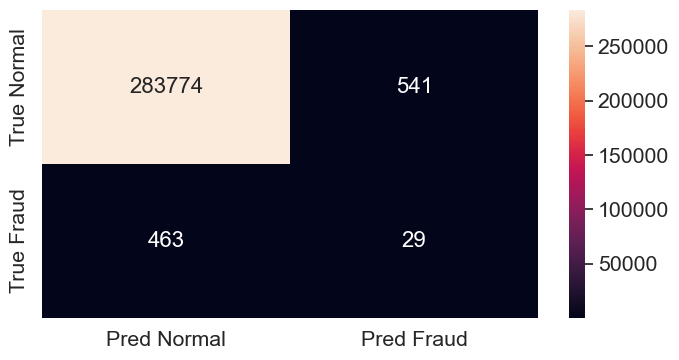

In [41]:
if_cm=confusion_matrix(labels, features['Class'])
df_cm = pd.DataFrame(if_cm,
                  ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
plt.figure(figsize = (8,4))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

In [42]:
from sklearn.neighbors import LocalOutlierFactor

clf_lof = LocalOutlierFactor(n_neighbors=30, 
                             algorithm='auto', 
                             contamination=.002)

# data_50k_new = standardized_data_without_class[0:50000]
# data_50k_df = pd.DataFrame(data=data_50k_new)

y_pred = clf_lof.fit_predict(features)

LOF_Scores = clf_lof.negative_outlier_factor_
LOF_pred=pd.Series(y_pred).replace([-1,1],[1,0])

<Axes: >

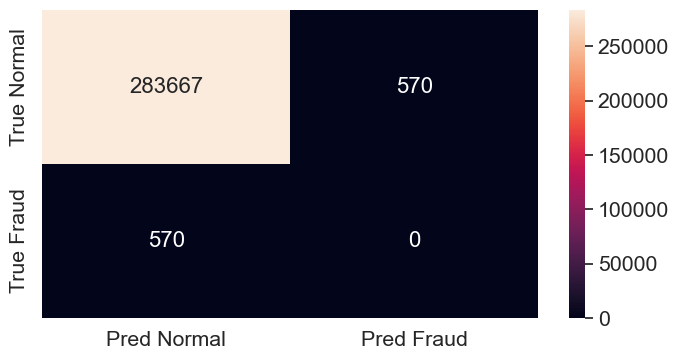

In [44]:
lof_cm=confusion_matrix(LOF_pred, features['Class'])
df_cm = pd.DataFrame(lof_cm,
                  ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
plt.figure(figsize = (8,4))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

Hasil prediksi antara LOF dengan Isolation Forest, yang bagus ada pada isolation forest karena hasil prediksi yang lebih masuk akal, jadi untuk data yang berkelanjutan akan menggunakan model XGBoost pada modelling dan Isolation Forest pada Unsupervised Learning